In [27]:
import csv
import matplotlib.pyplot as plt

In [3]:
fin = open('data/our_data.csv', 'r')
our = csv.DictReader(fin)
our_data = [row for row in our]

our_title = 'title'
our_platform = 'platform'
our_score = 'score'
our_release_y = 'release_year'
our_release_m = 'release_month'
our_release_d = 'release_day'

our_rank = 'Rank'
our_genre = 'Genre'
our_publisher = 'Publisher'
our_NA = 'NA_Sales'
our_EU = 'EU_Sales'
our_JP = 'JP_Sales'
our_other = 'Other_Sales'
our_global = 'Global_Sales'

our_keys = [our_title, our_platform, our_score, our_release_y, our_release_m, our_release_d, our_rank, our_genre, \
            our_publisher, our_NA, our_EU, our_JP, our_other, our_global]

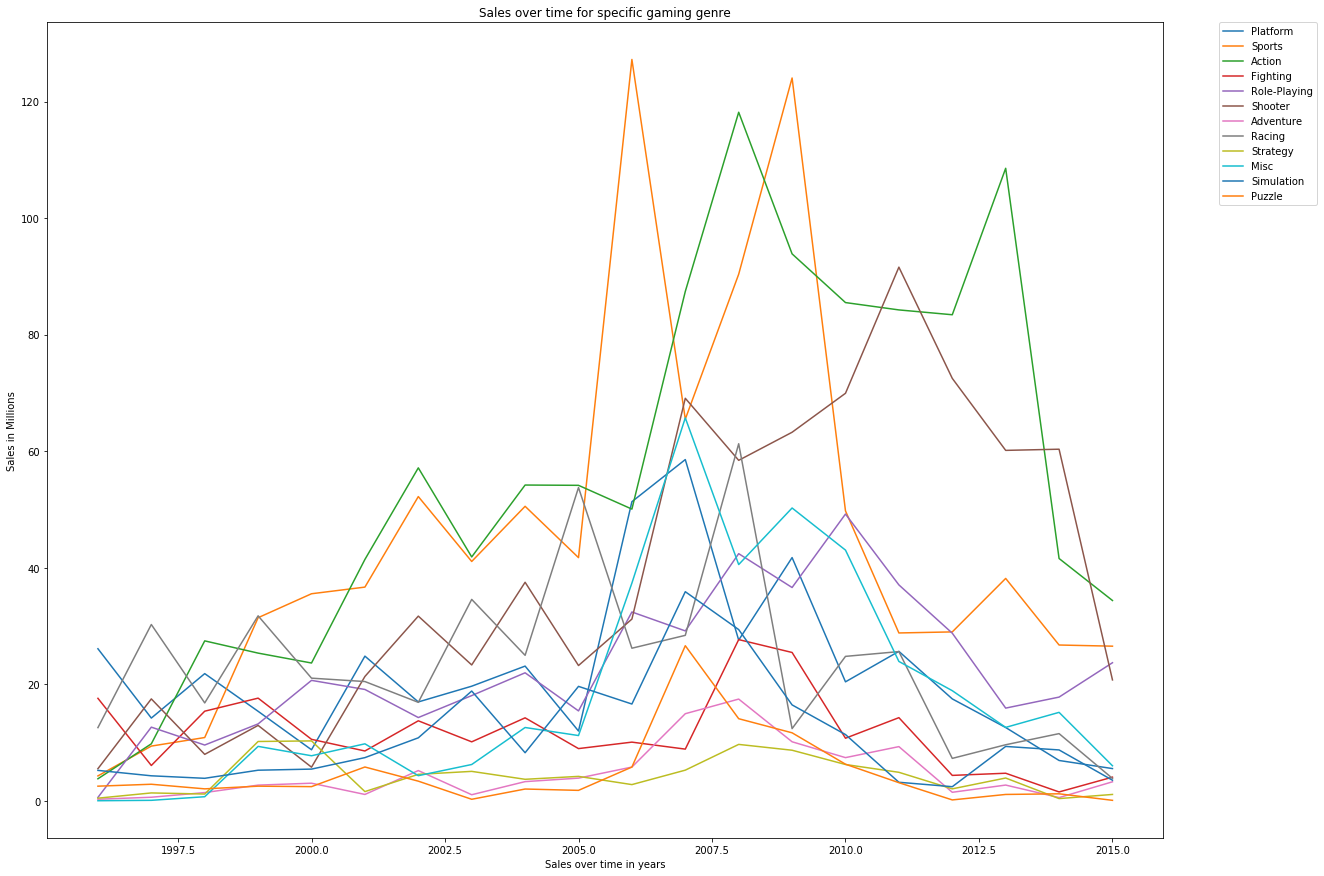

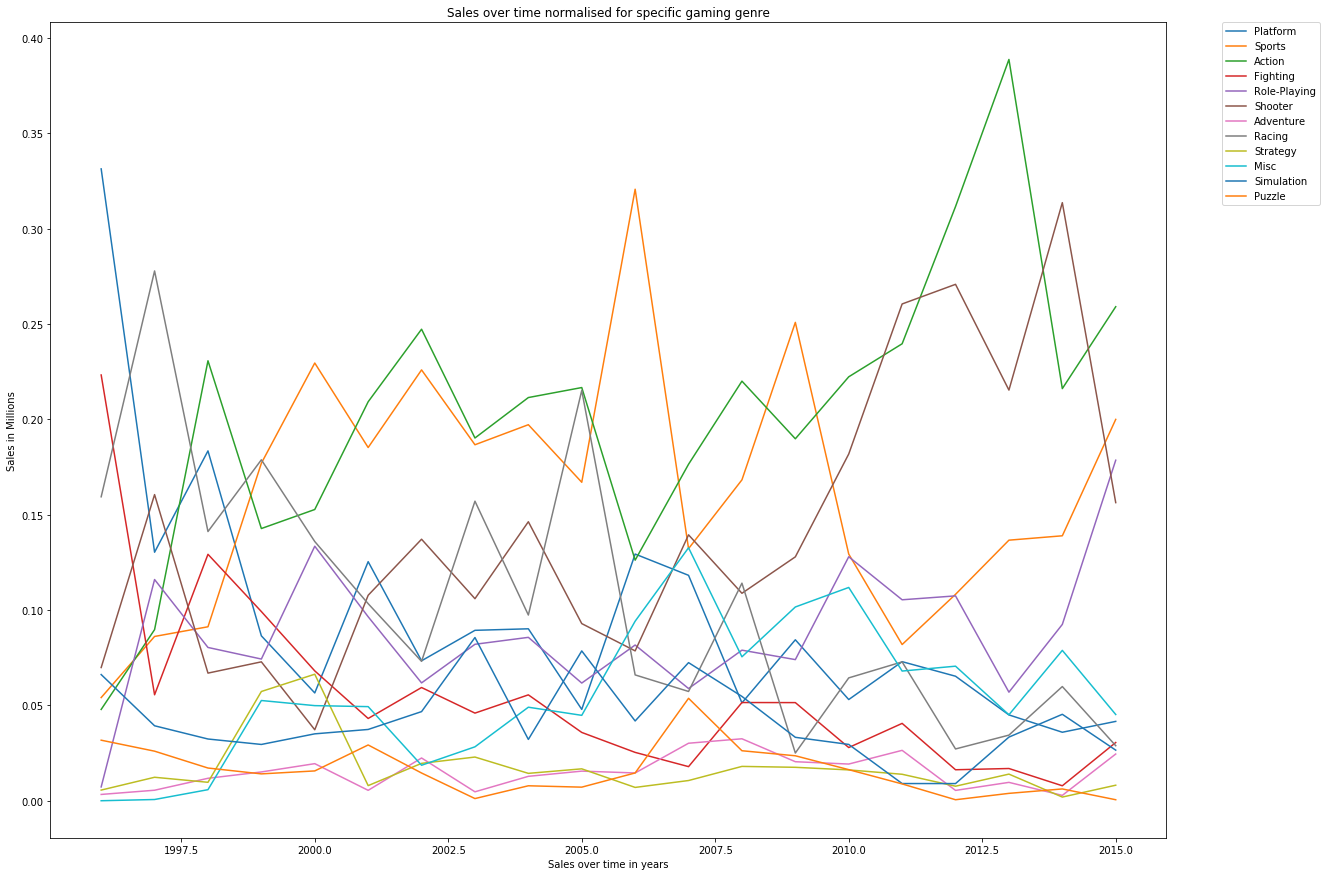

In [72]:
def get_key_values(data, key):
    values = []
    
    for row in data:
        if row[key] not in values:
            values += [row[key]]
            
    return values

def count_sales_key_year(data, key, value):
    years = get_key_values(data, our_release_y)
    years = [int(x) for x in years]
    years = sorted(years, key=int)
    years = [year for year in years if year < 2016]

    sales = [(sum([float(row[our_global]) for row in data if int(row[our_release_y]) == year and row[key] == value]), year) for year in years]
    
    return sales

def count_sales_key_year_norm(data, key, value):
    years = get_key_values(data, our_release_y)
    years = [int(x) for x in years]
    years = sorted(years, key=int)
    years = [year for year in years if year < 2016]

    
    sales = [(sum([float(row[our_global]) for row in data if int(row[our_release_y]) == year and row[key] == value]) /
              sum([float(row[our_global]) for row in data if int(row[our_release_y]) == year]), year) for year in years]
    
    return sales

def plot_sales_time_key(data, key, title):
    values = get_key_values(data, key)
    
    stgs = [count_sales_key_year(data, key, value) for value in values]
    plt.figure(figsize=(20,15))

    for i in range(0, len(stgs)):
        axis_x = [x[1] for x in stgs[i]]
        axis_y = [x[0] for x in stgs[i]]
        
        plt.plot(axis_x, axis_y, label=values[i])
    
    plt.xlabel('Sales over time in years')
    plt.ylabel('Sales in Millions')
    plt.title('Sales over time for specific ' + title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()

    stgs = [count_sales_key_year_norm(data, key, value) for value in values]
    plt.figure(figsize=(20,15))

    for i in range(0, len(stgs)):
        axis_x = [x[1] for x in stgs[i]]
        axis_y = [x[0] for x in stgs[i]]
        
        plt.plot(axis_x, axis_y, label=values[i])
    
    plt.xlabel('Sales over time in years')
    plt.ylabel('Sales in Millions')
    plt.title('Sales over time normalised for specific ' + title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()
    
plot_sales_time_key(our_data, our_genre, 'gaming genre')

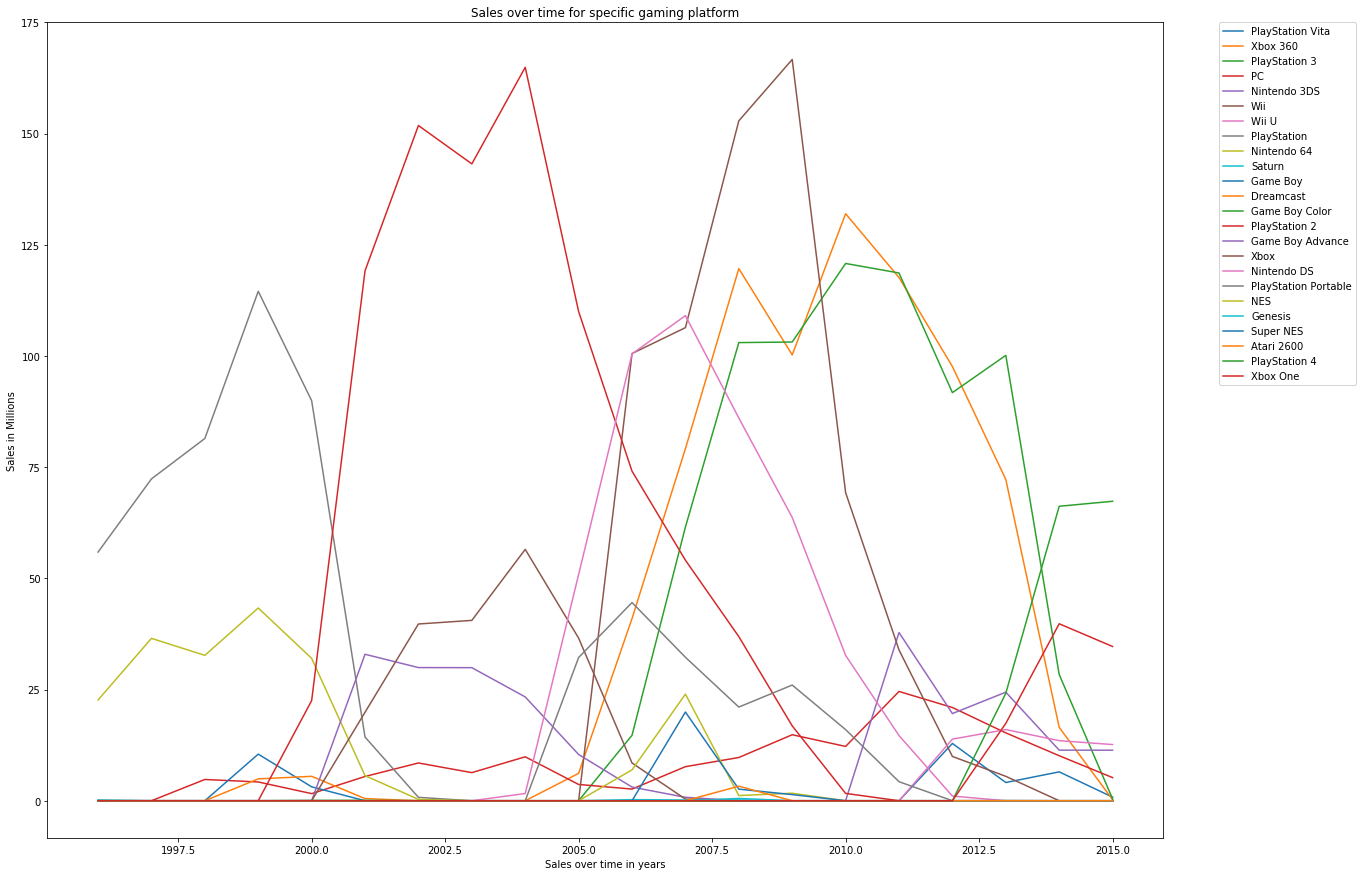

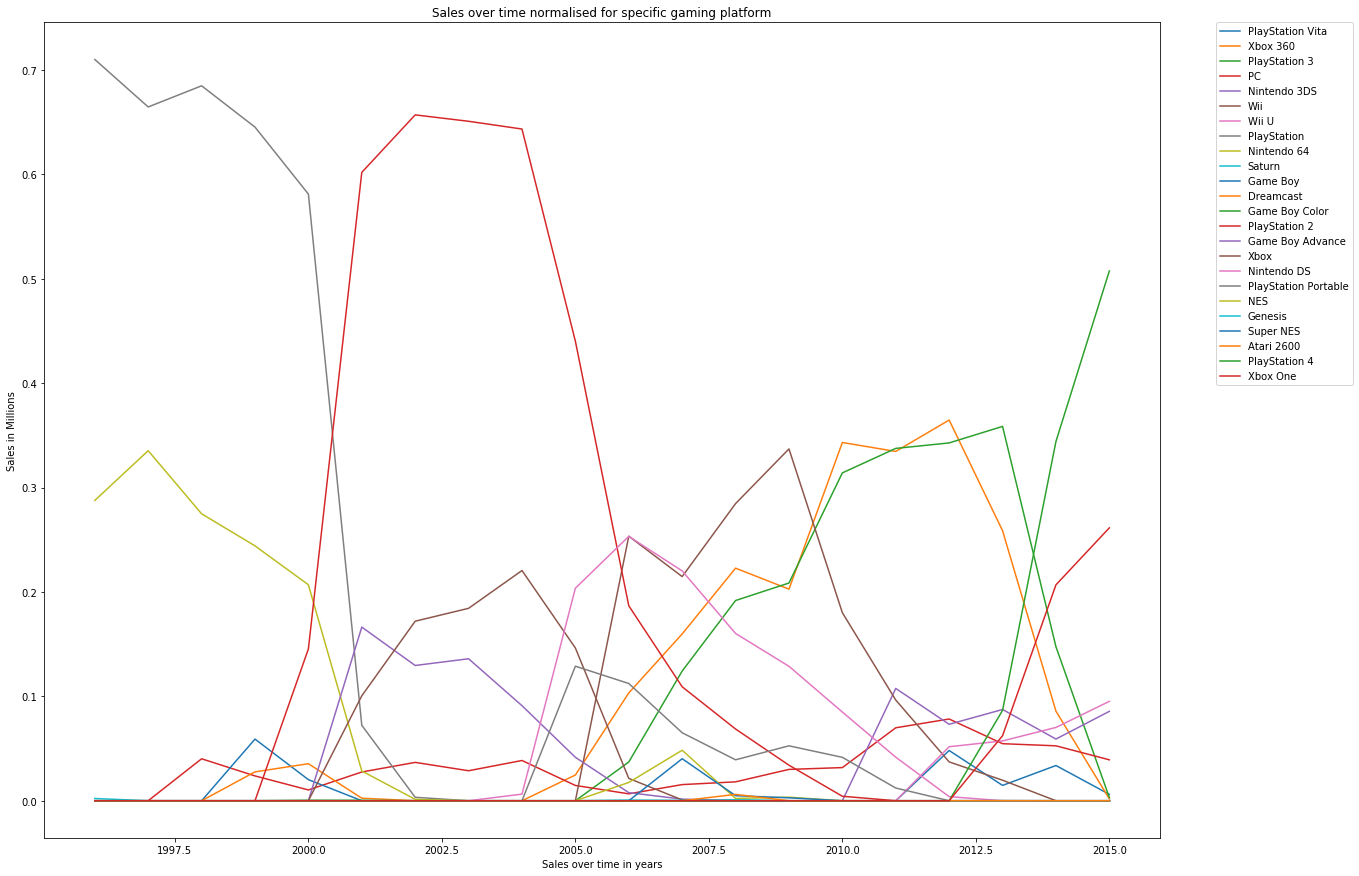

In [69]:
plot_sales_time_key(our_data, our_platform, 'gaming platform')

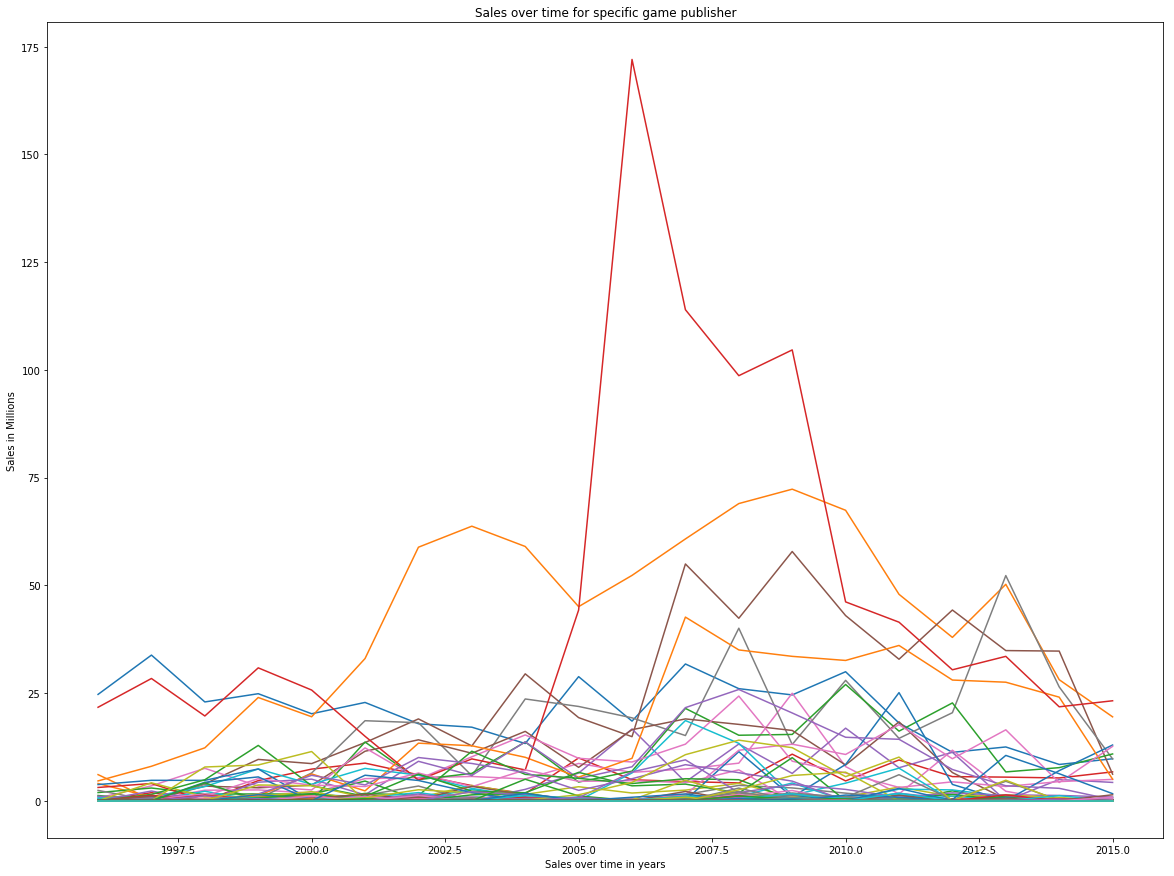

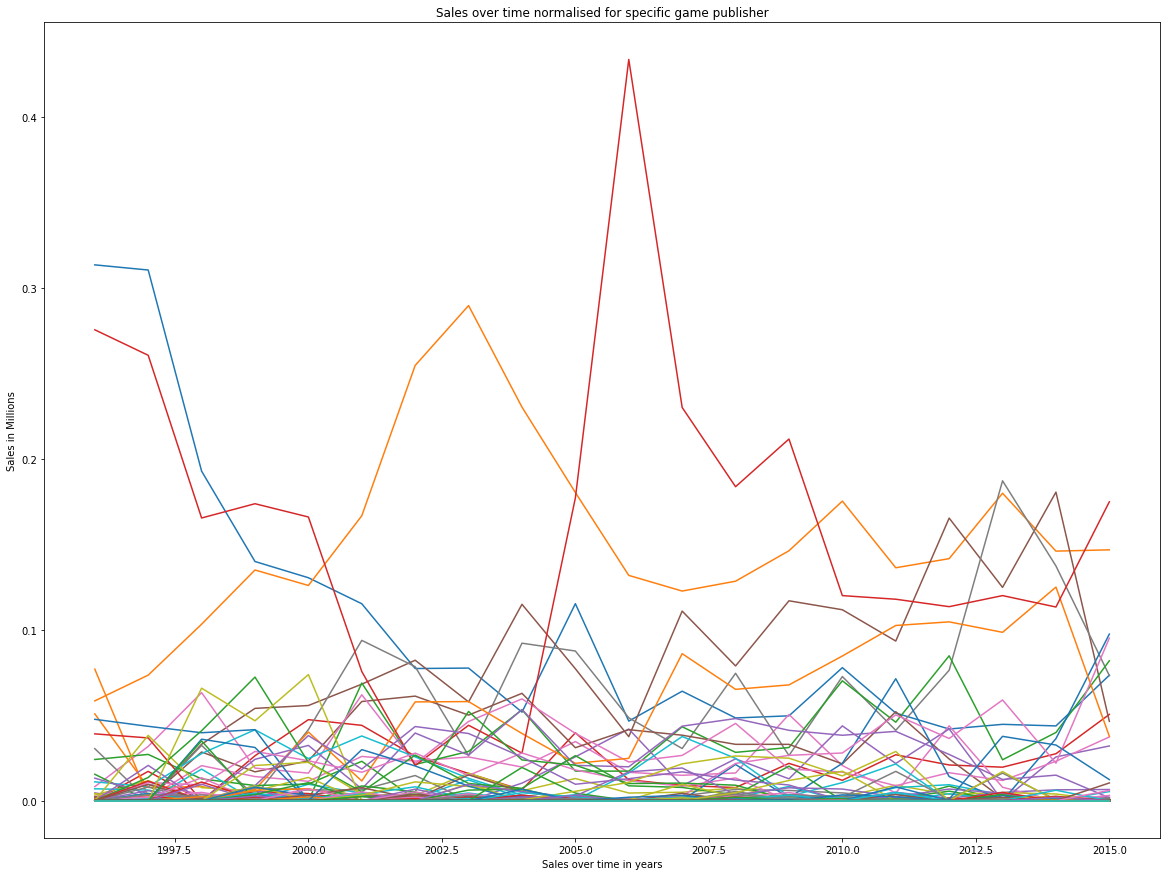

In [71]:
plot_sales_time_key(our_data, our_publisher, 'game publisher')